# Contructing a Value Stocks Portfolio

Value investing is an investment strategy that involves picking stocks that appear to be trading for less than their intrinsic or book value. Value investors actively ferret out stocks they think the stock market is underestimating. They believe the market overreacts to good and bad news, resulting in stock price movements that do not correspond to a company's long-term fundamentals. The overreaction offers an opportunity to profit by buying stocks at discounted prices—on sale.

Warren Buffett is probably the best-known value investor today, but there are many others, including Benjamin Graham (Buffett's professor and mentor), David Dodd, Charlie Munger, Christopher Browne (another Graham student), and billionaire hedge-fund manager, Seth Klarman.

In [2]:
import datetime as dt 
import pandas as pd
import concurrent.futures as cf
from yahoofinancials import YahooFinancials
import yfinance as yf
import re
import ast
import time
import requests

In [4]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [5]:
tickers = df.Symbol.to_list()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [7]:
balanceSheet = {}
incomeStatement = {}
cashStatement = {}

def retrieve_stock_data(stock):
    try:
        print(stock)
        yahoo_financials = YahooFinancials(stock)
        balance_sheet_data = yahoo_financials.get_financial_stmts('annual', 'balance')
        income_statement_data = yahoo_financials.get_financial_stmts('annual', 'income')
        cash_statement_data = yahoo_financials.get_financial_stmts('annual', 'cash')

        balanceSheet[stock] = balance_sheet_data['balanceSheetHistory'][stock]
        incomeStatement[stock] = income_statement_data['incomeStatementHistory'][stock]
        cashStatement[stock] = cash_statement_data['cashflowStatementHistory'][stock]
    except:
        print('error with retrieving stock data')

Using threading technique to speed up processing time

In [9]:
start = time.time()
executor = cf.ThreadPoolExecutor(16)
futures = [executor.submit(retrieve_stock_data, stock) for stock in tickers]
cf.wait(futures)
end = time.time()
print('  time taken {:.2f} s'.format(end-start))

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVIADM

ADBE
ADP
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BALL
BAC
BBWI
BAX
BDX
WRB
BRK.B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF.B
CHRW
CDNS
CZR
CPT
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CEG
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISH
DIS
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
ELV
LLY
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCXGRMN

IT
GNRC
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HUM

In [13]:
roe_dict, epsg_dict = {}, {}
count_missing, count_cond, count_eps_0 = 0, 0, 0
for (keyB, valB), (keyI, valI) in zip(balanceSheet.items(), incomeStatement.items()):
    try:
        if keyB == keyI:
            yearsI = [k for year in valI for k, v in year.items()]
            yearsB = [k for year in valB for k, v in year.items()]
            if yearsI == yearsB:
                count_cond += 1
                equity = [v['totalStockholderEquity'] for year in valB for k, v in year.items()]
                commonStock = [v['commonStock'] for year in valB for k, v in year.items()]

                profit = [v['grossProfit'] for year in valI for k, v in year.items()]
                revenue = [v['totalRevenue'] for year in valI for k, v in year.items()]
                netIncome = [v['netIncome'] for year in valI for k, v in year.items()]

                roe = [round(netin/equity*100,2) for netin, equity in zip(netIncome, equity)]
                roe_dict[keyB] = (round(sum(roe)/len(roe),2), roe)

                eps = [round(earn/stono,2) for earn, stono in zip(profit, commonStock)]
                
                try:
                    epsg = []
                    for ep in range(len(eps)):
                        if ep == 0:
                            continue
                        elif ep == 1:
                            epsg.append(round(100*((eps[ep-1]/eps[ep])-1),2))
                        elif ep == 2:
                            epsg.append(round(100*((eps[ep-2]/eps[ep])**(1/2)-1),2))
                            epsg.append(round(100*((eps[ep-1]/eps[ep])-1),2))
                        elif ep == 3:
                            epsg.append(round(100*((eps[ep-3]/eps[ep])**(1/3)-1),2))
                            epsg.append(round(100*((eps[ep-1]/eps[ep])-1),2))
                        else:
                            print('More than 4 years of FY data')
                        
                    epsg_dict[keyB] = (round(sum(epsg)/len(epsg),2), epsg)
                except:
#                     print(keyB, 'eps contains 0')
                    count_eps_0 += 1
                    epsg_dict[keyB] = (0, eps)

    except:
#         print(keyB, 'data missing')
        count_missing += 1

print('Yearly data avail',count_cond, 'out of', len(balanceSheet))
print('Some key data missing', count_missing, 'out of', len(balanceSheet))
print('EPS Growth NaN', count_eps_0, 'out of', len(balanceSheet))

Yearly data avail 501 out of 503
Some key data missing 41 out of 503
EPS Growth NaN 4 out of 503


## Intrinsic Value and Value Investing
In the stock market, the equivalent of a stock being cheap or discounted is when its shares are undervalued. Value investors hope to profit from shares they perceive to be deeply discounted.

Investors use various metrics to attempt to find the valuation or intrinsic value of a stock. Intrinsic value is a combination of using financial analysis such as studying a company's financial performance, revenue, earnings, cash flow, and profit as well as fundamental factors, including the company's brand, business model, target market, and competitive advantage. Some metrics used to value a company's stock include:

- Price-to-book (P/B) or book value, which measures the value of a company's assets and compares them to the stock price. If the price is lower than the value of the assets, the stock is undervalued, assuming the company is not in financial hardship.
- Price-to-earnings (P/E), which shows the company's track record for earnings to determine if the stock price is not reflecting all of the earnings or is undervalued.
- Free cash flow, which is the cash generated from a company's revenue or operations after the costs of expenditures have been subtracted. Free cash flow is the cash remaining after expenses have been paid, including operating expenses and large purchases called capital expenditures, which is the purchase of assets like equipment or upgrading a manufacturing plant. If a company is generating free cash flow, it'll have money left over to invest in the future of the business, pay off debt, pay dividends or rewards to shareholders, and issue share buybacks.

There are many other metrics used in the analysis, including analyzing debt, equity, sales, and revenue growth. After reviewing these metrics, the value investor can decide to purchase shares if the comparative value—the stock's current price vis-a-vis its company's intrinsic worth—is attractive enough.

Now we can screen stocks based on fundamental values. In this porfolio we choose all stocks that show above market average ROE and EPSG.

In [18]:
ROE_req = 15
EPSG_req = 8
print('-'*50, 'RETURN ON EQUITY','-'*50)
roe_crit = {k:v for (k,v) in roe_dict.items() if v[0] >= ROE_req and sum(n < 0 for n in v[1])==0}
# print(roe_crit)
print('-'*50, 'EARNINGS PER SHARE GROWTH','-'*50)
eps_crit = {k:v for (k,v) in epsg_dict.items() if v[0] >= EPSG_req and sum(n < 0 for n in v[1])==0}
# print(eps_crit)
print('-'*50, 'ROE & EPS Growth Critera','-'*50)
both = [key1 for key1 in roe_crit.keys() for key2 in eps_crit.keys() if key2==key1]
print(both)

-------------------------------------------------- RETURN ON EQUITY --------------------------------------------------
-------------------------------------------------- EARNINGS PER SHARE GROWTH --------------------------------------------------
-------------------------------------------------- ROE & EPS Growth Critera --------------------------------------------------
['A', 'ACN', 'ALGN', 'AMZN', 'ABC', 'BIO', 'BBY', 'CDW', 'CRL', 'CMG', 'CLX', 'COST', 'DHI', 'DVA', 'CPRT', 'DG', 'LLY', 'EPAM', 'EXR', 'ETSY', 'FTV', 'FTNT', 'FISV', 'FOXA', 'FBHS', 'FOX', 'GNRC', 'IT', 'GILD', 'GRMN', 'HSY', 'INTU', 'LH', 'KLAC', 'LMT', 'MMC', 'MTD', 'MSFT', 'MNST', 'MCO', 'NVR', 'PAYC', 'PNR', 'PFE', 'POOL', 'PHM', 'PSA', 'DGX', 'REGN', 'RMD', 'SPGI', 'TROW', 'TTWO', 'TGT', 'TER', 'TMO', 'TSCO', 'UNH', 'UHS', 'VRSK', 'VRTX', 'WST', 'ZTS']


Now we have screened 63 firms that fit our simple criteria of value stocks. Now we go ahead to contruct a portfolio out of these stocks to see if value stocks outperforms the benchmark s&p 500 index.

In [19]:
# Importing Library necessary for the project
import numpy as np
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [16, 10]
np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf
import scipy.optimize as sco

In [21]:
start = "2015-01-01"
end = "2022-07-08"
val_tickers = both
stocks_df = pd.DataFrame()
for stock_name in val_tickers:
    # daily data
    stocks_df[stock_name] = yf.download(stock_name,start,end)['Adj Close']  
    
stocks_df = round(stocks_df,2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [33]:
returns = stocks_df.pct_change().dropna()
N_DAYS = 252    # number of trading dates in a years
tot_return  = returns.mean() * N_DAYS
cov_mat = returns.cov() * N_DAYS
n_assets = len(val_tickers)

In [34]:
# Create effecient frontier using monte carlo simulation
N_PORTFOLIOS = 10 ** 5
n_assets = len(val_tickers)
#Simulate random portfolio weights:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [35]:
#Calculate the portfolio metrics:
portf_rtns = np.dot(weights, tot_return)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [36]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol,'sharpe_ratio': portf_sharpe_ratio})
portf_results_df

,returns,volatility,sharpe_ratio
0,0.222353,0.234953,0.946373
1,0.216240,0.236769,0.913293
2,0.223494,0.226557,0.986478
3,0.207202,0.229885,0.901326
4,0.231625,0.233239,0.993080
...,...,...,...
99995,0.211273,0.238908,0.884328
99996,0.231584,0.235425,0.983686
99997,0.227127,0.238725,0.951417
99998,0.221548,0.231304,0.957821


In [52]:
# find the portfolio with lowest volatility 
low_vol_portfolio = portf_results_df.iloc[ portf_results_df['volatility'].idxmin() ]
print("Global Minimum Volatility portfolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# find the portfolio with highest sharpe ratio
high_sharpe_portfolio = portf_results_df.iloc[ portf_results_df['sharpe_ratio'].idxmax() ]
print("Maximum Sharpe Ratio portfolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

Global Minimum Volatility portfolio:
- return      : 20.42%
- volatility  : 21.45%
- sharpe ratio: 0.95
Maximum Sharpe Ratio portfolio:
- return      : 24.73%
- volatility  : 22.86%
- sharpe ratio: 1.08


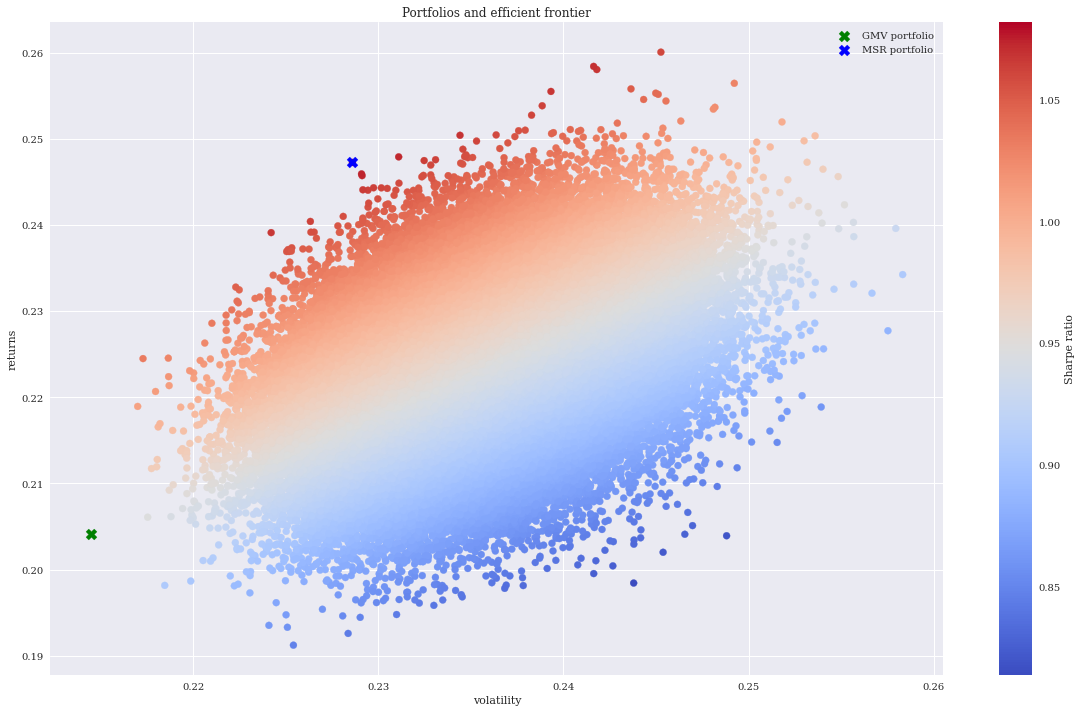

In [59]:
#Plotting the results of monte carlo simulation
fig, ax = plt.subplots(1,1, figsize=(20,12)) 
fig = plt.scatter(portf_results_df['volatility'], portf_results_df['returns'],
c=portf_results_df['sharpe_ratio'], cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='b', s=120, label="MSR portfolio")
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("returns")
ax.legend()
#plt.xlabel('expected volatility')
#plt.ylabel('expected return')
#plt.title('Effiecient Frontier using Monte Carlo Simulation');

In above we calculated porfolio weights using monte carlo simulation but now lets see if we can do better with optimization. We maximize sharpe ratio for are given portfolio.

In [60]:
#Define functions calculating portfolio returns and volatility:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

def port_vol(w, avg_rtns, cov_mat):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    return portf_volatility 

def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

In [41]:
RF_RATE = 0

args = (tot_return, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf_opt = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [43]:
max_sharpe_portf_w = max_sharpe_portf_opt['x']
print("Global Maximum Sharpe Ratio portfolio:")
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            tot_return),
                    'Volatility': port_vol(max_sharpe_portf_w, 
                                                tot_return, 
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf_opt['fun']}
max_sharpe_portf

Global Maximum Sharpe Ratio portfolio:


{'Return': 0.37646008845568285,
 'Volatility': 0.230303098206843,
 'Sharpe Ratio': 1.6346288494893426}

We can see the optimized porfolio significantly outperforms the monte carlo method.

In [61]:
spy = yf.download('^GSPC','2019-03-14',end)['Adj Close']  
spy_ret =  spy.pct_change().dropna()
tot_spy = spy_ret.cumsum()

[*********************100%***********************]  1 of 1 completed


In [62]:
ret_msr = (returns*max_sharpe_portf_w).sum(axis='columns')
total_ret_msr = ret_msr.cumsum()

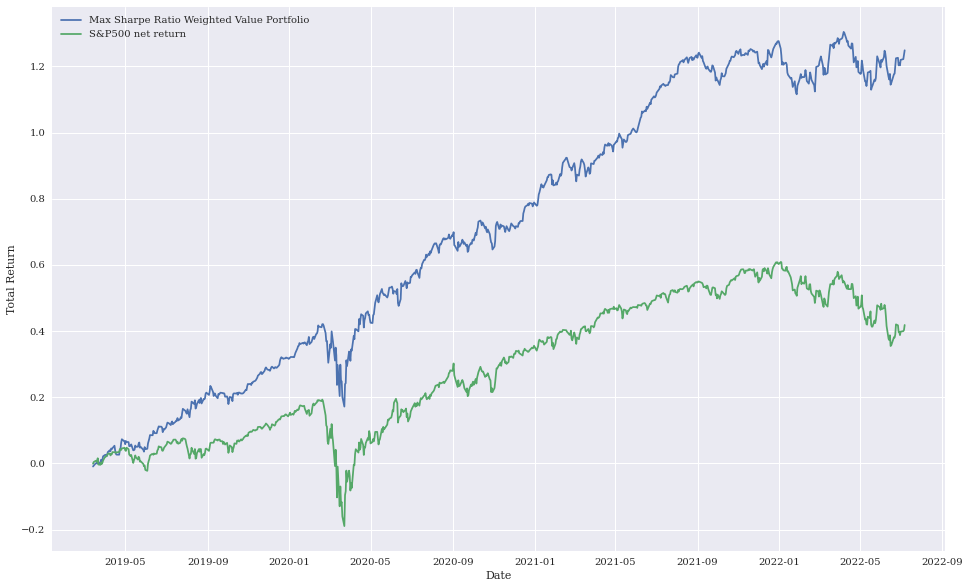

In [63]:
plt.plot(total_ret_msr, label='Max Sharpe Ratio Weighted Value Portfolio')
plt.plot(tot_spy, label='S&P500 net return')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.legend(loc="upper left")

Thus, we can see in the graph above that our portfolio consisting of value stocks outperforms the benchmark with a sharpe ratio of 1.63. As we can see value is not dead and it might be making a comeback given the market correction happening right now.